In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/cansim-0800020-eng-6674700030567901031.csv', skiprows=6, skipfooter=9, engine='python')

In [3]:
df.head()

,Adjustments,Unadjusted,Seasonally adjusted
0,Jan-1991,12588862,15026890
1,Feb-1991,12154321,15304585
2,Mar-1991,14337072,15413591
3,Apr-1991,15108570,15293409
4,May-1991,17225734,15676083


In [4]:
from pandas.tseries.offsets import MonthEnd

In [5]:
df['Adjustments'] = pd.to_datetime(df['Adjustments']) + MonthEnd(1)
df = df.set_index('Adjustments')
df.head()

,Unadjusted,Seasonally adjusted
Adjustments,,
1991-01-31,12588862,15026890
1991-02-28,12154321,15304585
1991-03-31,14337072,15413591
1991-04-30,15108570,15293409
1991-05-31,17225734,15676083


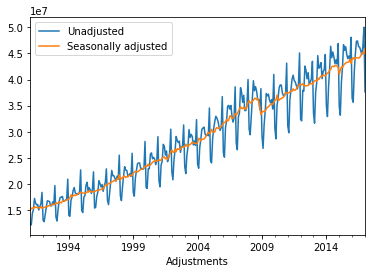

In [6]:
df.plot()

In [7]:
split_date = pd.Timestamp('01-01-2011')

In [8]:
split_date

Timestamp('2011-01-01 00:00:00')

In [9]:
# From beginning upto splitdate
train = df.loc[:split_date, ['Unadjusted']]
# From splitdate to the end
test = df.loc[split_date:, ['Unadjusted']]

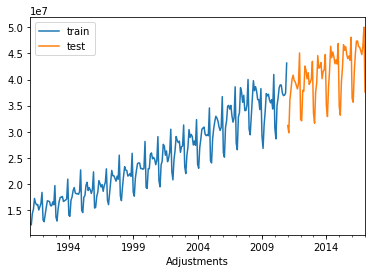

In [10]:
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
sc = MinMaxScaler()

train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [13]:
train_sc[:4]

array([[0.01402033],
       [0.        ],
       [0.0704258 ],
       [0.09531795]])

# Data split

In [14]:
X_train = train_sc[:-1]
y_train = train_sc[1:]

X_test = test_sc[:-1]
y_test = test_sc[1:]

# Fully connected predictor

In [15]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping

C:\Users\Shin\Anaconda3\envs\tensorflow_windows\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [16]:
K.clear_session()

model = Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                24        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [17]:
early_stopping = EarlyStopping(monitor='loss', patience=1, verbose=1)

In [18]:
model.fit(X_train, y_train, epochs=200, batch_size=2, verbose=1, callbacks=[early_stopping])

Epoch 1/200
239/239 [==============================] - 0s 2ms/step - loss: 0.1283
Epoch 2/200
239/239 [==============================] - 0s 404us/step - loss: 0.0374
Epoch 3/200
239/239 [==============================] - 0s 388us/step - loss: 0.0246
Epoch 4/200
239/239 [==============================] - 0s 395us/step - loss: 0.0216
Epoch 5/200
239/239 [==============================] - 0s 382us/step - loss: 0.0189
Epoch 6/200
239/239 [==============================] - 0s 398us/step - loss: 0.0168
Epoch 7/200
239/239 [==============================] - 0s 376us/step - loss: 0.0149
Epoch 8/200
239/239 [==============================] - 0s 377us/step - loss: 0.0134
Epoch 9/200
239/239 [==============================] - 0s 380us/step - loss: 0.0122
Epoch 10/200
239/239 [==============================] - 0s 385us/step - loss: 0.0114
Epoch 11/200
239/239 [==============================] - 0s 384us/step - loss: 0.0108
Epoch 12/200
239/239 [==============================] - 0s 384us/step - loss

In [19]:
y_pred = model.predict(X_test)

In [20]:
y_pred[:5]

array([[0.58767426],
       [0.5472215 ],
       [0.72942716],
       [0.7852789 ],
       [0.8432904 ]], dtype=float32)

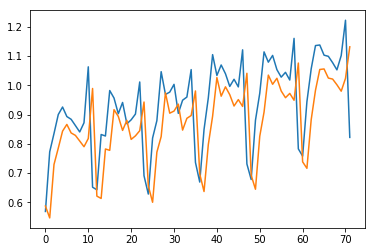

In [21]:
plt.plot(y_test)
plt.plot(y_pred)

# Recurrent predictor

In [22]:
from keras.layers import LSTM

In [23]:
X_train.shape

(239, 1)

In [24]:
# 3d tensor with shape (batch_size, timesteps, input_dim)
X_train[:, None].shape

(239, 1, 1)

In [25]:
X_train_t = X_train[:, None]
X_test_t = X_test[:, None]

In [26]:
K.clear_session()
model = Sequential()

model.add(LSTM(6, input_shape=(1, 1)))

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

In [27]:
model.fit(X_train_t, y_train, epochs=100, batch_size=1, verbose=1, callbacks=[early_stopping])

Epoch 1/100
239/239 [==============================] - 1s 4ms/step - loss: 0.1078
Epoch 2/100
239/239 [==============================] - 0s 1ms/step - loss: 0.0344
Epoch 3/100
239/239 [==============================] - 0s 1ms/step - loss: 0.0266
Epoch 4/100
239/239 [==============================] - 0s 1ms/step - loss: 0.0211
Epoch 5/100
239/239 [==============================] - 0s 1ms/step - loss: 0.0164
Epoch 6/100
239/239 [==============================] - 0s 1ms/step - loss: 0.0132
Epoch 7/100
239/239 [==============================] - 0s 1ms/step - loss: 0.0116
Epoch 8/100
239/239 [==============================] - 0s 1ms/step - loss: 0.0107
Epoch 9/100
239/239 [==============================] - 0s 1ms/step - loss: 0.0104
Epoch 10/100
239/239 [==============================] - 0s 1ms/step - loss: 0.0102
Epoch 11/100
239/239 [==============================] - 0s 1ms/step - loss: 0.0102
Epoch 12/100
239/239 [==============================] - 0s 1ms/step - loss: 0.0103
Epoch 00012: 

In [28]:
y_pred = model.predit(X_test_t)
plt.plot(y_test)
plt.plot(y_pred)

AttributeError: 'Sequential' object has no attribute 'predit'